In [5]:
pip install shap lime xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [7]:
import os

current_path = os.getcwd()
print("Current Path:", current_path)

Current Path: /sciclone/data10/iahewababarand/applied_machine_learning/ml_approches


In [8]:
df = pd.read_json("../data/adjacent_change_processed/output_file.json")
print(df.shape)
df.head()

df = df.dropna()

(59756, 20)


In [9]:
import pandas as pd

# Check class distribution
print("Class distribution before balancing:")
print(df['user_class'].value_counts())

# Identify the minority and majority classes dynamically
class_counts = df['user_class'].value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

# Split the dataset into majority and minority classes
df_minority = df[df['user_class'] == minority_class]
df_majority = df[df['user_class'] == majority_class]

# Find the size of the minority class
minority_size = len(df_minority)

# Downsample the majority class to the size of the minority class
df_majority_downsampled = df_majority.sample(n=minority_size, random_state=42)

# Combine the downsampled majority class with the minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset to mix classes
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print("Class distribution after balancing:")
print(df['user_class'].value_counts())


Class distribution before balancing:
user_class
bot      32042
human    27703
Name: count, dtype: int64
Class distribution after balancing:
user_class
human    27703
bot      27703
Name: count, dtype: int64


In [10]:
# List of columns to select
columns_to_select = [
    "user_class", 
    "tweet_count", 
    "change_content_syntactic", 
    "change_action", 
    "change_change_dynamic_score", 
    "highest_change_in_content_syntactic", 
    "lowest_change_in_content_syntactic", 
    "standard_deviation_of_content_syntactic", 
    "highest_change_in_action", 
    "lowest_change_in_action", 
    "standard_deviation_of_action",
    'diversity_action', 
    'diversity_content_syntactic',
    'diversity_change_dynamics_score'
]

# Subset the DataFrame
df_subset = df[columns_to_select]
df_subset.head()

,user_class,tweet_count,change_content_syntactic,change_action,change_change_dynamic_score,highest_change_in_content_syntactic,lowest_change_in_content_syntactic,standard_deviation_of_content_syntactic,highest_change_in_action,lowest_change_in_action,standard_deviation_of_action,diversity_action,diversity_content_syntactic,diversity_change_dynamics_score
0,human,179,0.735221,0.413599,0.474947,1.0,0.000000,0.416731,1.000000,2.220446e-16,0.307163,0.814237,0.748757,1.233153
1,human,276,0.512662,0.335346,0.984078,1.0,0.000000,0.415535,1.000000,2.220446e-16,0.273812,0.688705,0.671567,0.185531
2,bot,25,0.701685,0.308534,0.835010,1.0,0.167950,0.331267,0.641431,7.417990e-02,0.188902,0.852464,0.895096,2.118592
3,bot,32,0.687850,0.591693,0.627590,1.0,0.292893,0.292918,1.000000,9.546597e-02,0.308661,0.799555,0.847495,1.502658
4,bot,171,0.826534,0.438563,0.627147,1.0,0.000000,0.365723,1.000000,0.000000e+00,0.331568,0.811741,0.763221,1.269834


In [11]:
X = df_subset.drop(columns=['user_class', 'tweet_count'])  # Drop the target column
labels = df_subset['user_class']                # Target column
# X = df_subset[['change_change_dynamic_score']]  # Drop the target column

In [12]:
# Convert target labels to numeric
label_mapping = {'bot': 0, 'human': 1}
labels = labels.map(label_mapping)

In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

In [14]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)        # Transform testing data

In [ ]:
xgb = XGBClassifier(
    n_estimators=100,         # Number of trees
    learning_rate=0.1,        # Step size shrinkage
    max_depth=5,              # Maximum tree depth
    random_state=42,
    use_label_encoder=False,  # Avoids deprecation warning in newer versions of XGBoost
    eval_metric='logloss'     # Evaluation metric for classification
)


In [16]:
xgb.fit(X_train_scaled, y_train)

/sciclone/data10/iahewababarand/.venv/lib64/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:52:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [17]:
# Make predictions
y_pred = xgb.predict(X_test_scaled)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')        # Use 'weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')                # Use 'weighted' for multiclass

In [19]:
# Display evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

Model Evaluation Metrics:
Accuracy: 0.8648
Precision: 0.8649
Recall: 0.8648
F1 Score: 0.8648

Confusion Matrix:
[[7066 1203]
 [1044 7309]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      8269
           1       0.86      0.88      0.87      8353

    accuracy                           0.86     16622
   macro avg       0.86      0.86      0.86     16622
weighted avg       0.86      0.86      0.86     16622


Feature Importances:
                                    Feature  Importance
5   standard_deviation_of_content_syntactic    0.242286
2               change_change_dynamic_score    0.122722
11          diversity_change_dynamics_score    0.118897
6                  highest_change_in_action    0.107668
4        lowest_change_in_content_syntactic    0.078841
0                  change_content_syntactic    0.075398
10              diversity_content_syntactic    0.054270
8              standard_deviation_of_act

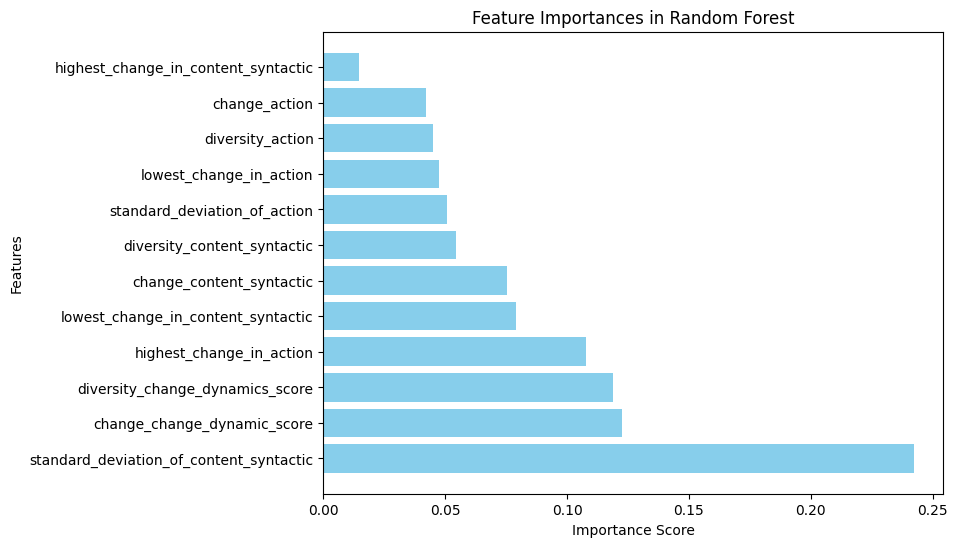

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances in Random Forest")
plt.show()


In [ ]:
# import shap

# # Initialize the SHAP explainer
# explainer = shap.TreeExplainer(rf)  # Works well with tree-based models
# shap_values = explainer.shap_values(X)

# # Explain a single prediction
# instance = X.iloc[0]  # Choose the instance you want to explain
# shap.force_plot(explainer.expected_value[1], shap_values[1][0], X.iloc[0])

/sciclone/data10/iahewababarand/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'rf' is not defined